In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']=10,5
plt.rcParams['figure.dpi']=300
%matplotlib inline

# Q1 →→→ANS

In [2]:
df = pd.read_csv(r"C:\Users\mange\OneDrive\Documents\DS\Assignmnet_Material\4_Simple_Linear_Regression\delivery_time.csv")
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [3]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
sc = StandardScaler()

x  = sc.fit_transform(df)

x

array([[ 0.84986692,  1.53562462],
       [-0.66449036, -0.88298415],
       [ 0.59747404, -0.07678123],
       [ 1.45560983,  1.13252315],
       [ 2.46518134,  1.53562462],
       [-0.2909489 , -0.07678123],
       [ 0.44603831,  0.32632023],
       [-1.47214757, -1.28608562],
       [ 0.22393258,  1.53562462],
       [ 0.39555973,  1.13252315],
       [ 0.61362718,  0.72942169],
       [-1.21975469, -0.88298415],
       [-0.02240287,  0.32632023],
       [-1.06831896, -1.28608562],
       [-0.96130438, -1.28608562],
       [-0.38584862, -0.88298415],
       [-0.61401178, -0.07678123],
       [ 0.26633458,  0.32632023],
       [-1.77501902, -1.68918708],
       [ 0.20979858,  0.32632023],
       [ 0.95082407, -0.47988269]])

In [6]:
x = pd.DataFrame(x)
x

,0,1
0,0.849867,1.535625
1,-0.664490,-0.882984
2,0.597474,-0.076781
3,1.455610,1.132523
4,2.465181,1.535625
5,-0.290949,-0.076781
6,0.446038,0.326320
7,-1.472148,-1.286086
8,0.223933,1.535625
9,0.395560,1.132523


In [7]:
x = x.rename({0 : 'delivery' , 1 : 'sorting'} , axis=1)
x

,delivery,sorting
0,0.849867,1.535625
1,-0.664490,-0.882984
2,0.597474,-0.076781
3,1.455610,1.132523
4,2.465181,1.535625
5,-0.290949,-0.076781
6,0.446038,0.326320
7,-1.472148,-1.286086
8,0.223933,1.535625
9,0.395560,1.132523


In [8]:
M = smf.ols('delivery ~ sorting' , data = x).fit()
M.pvalues

Intercept    1.000000
sorting      0.000004
dtype: float64

In [28]:
M.rsquared , M.rsquared_adj

(0.682271474841723, 0.6655489208860242)

In [10]:
df.isna().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [11]:
df.shape

(21, 2)

In [12]:
df.duplicated().sum()

0

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 468.0 bytes


In [14]:
df=df.rename({"Delivery Time": "delivery_time" , "Sorting Time" : "sorting_time"} , axis=1)
df

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


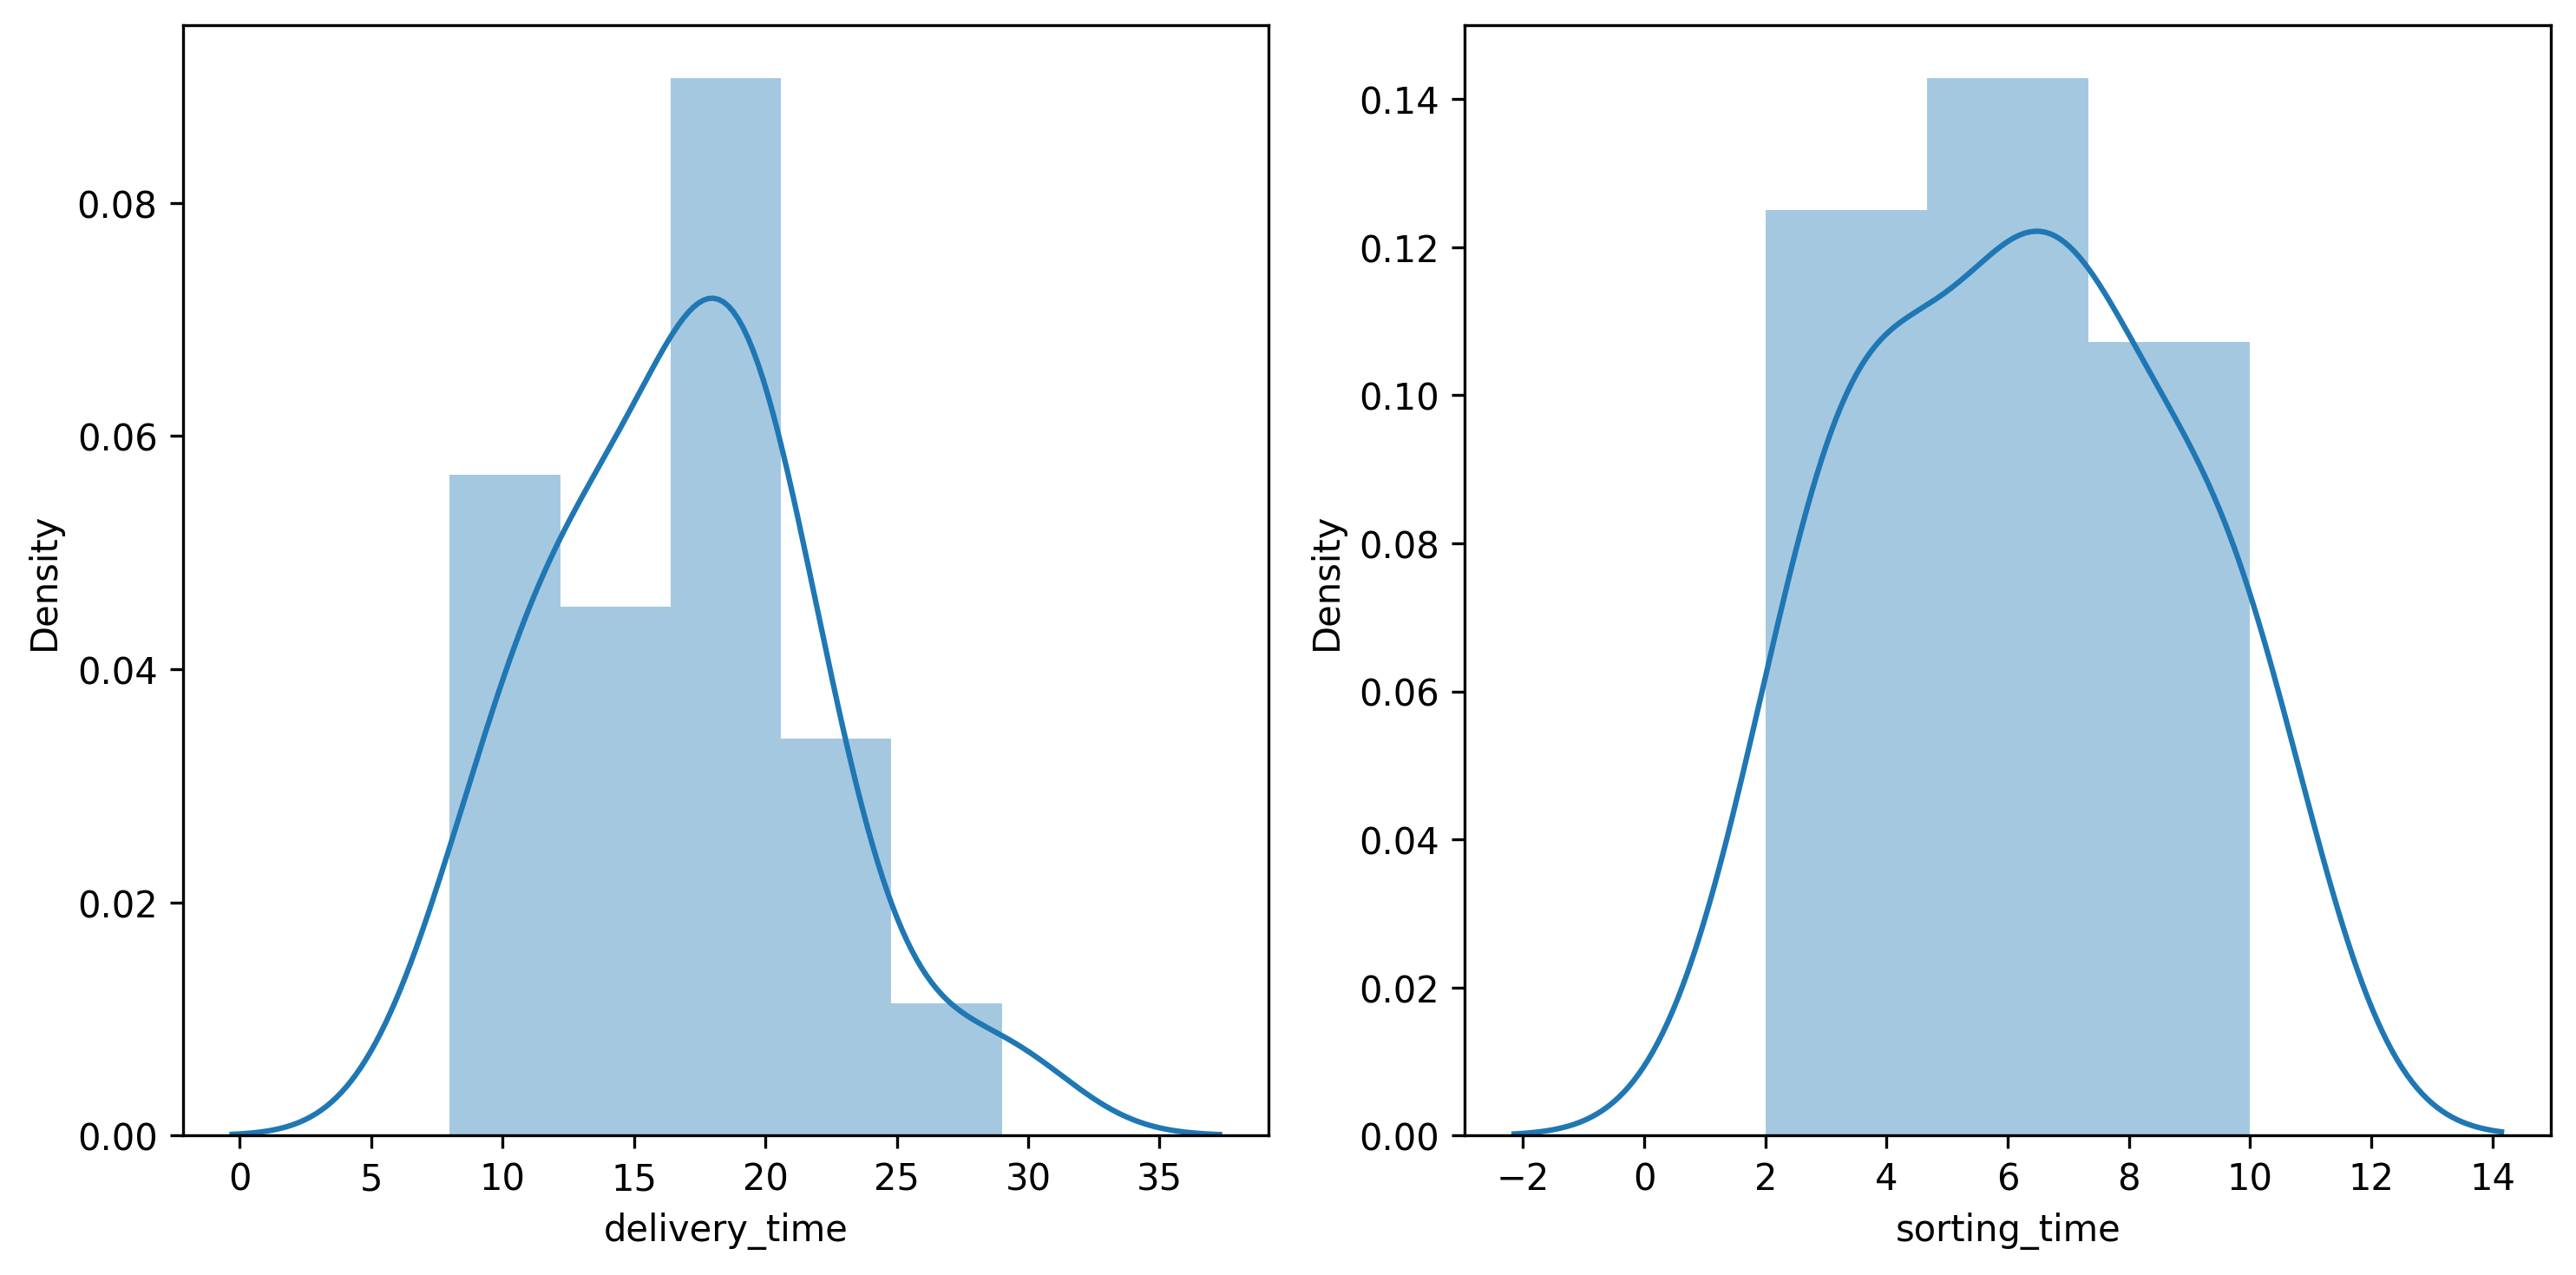

In [15]:
plt.subplot(1,2,1)
sns.distplot(df['delivery_time'])

plt.subplot(1,2,2)
sns.distplot(df['sorting_time'])

plt.tight_layout()

In [16]:
df.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


<Axes: >

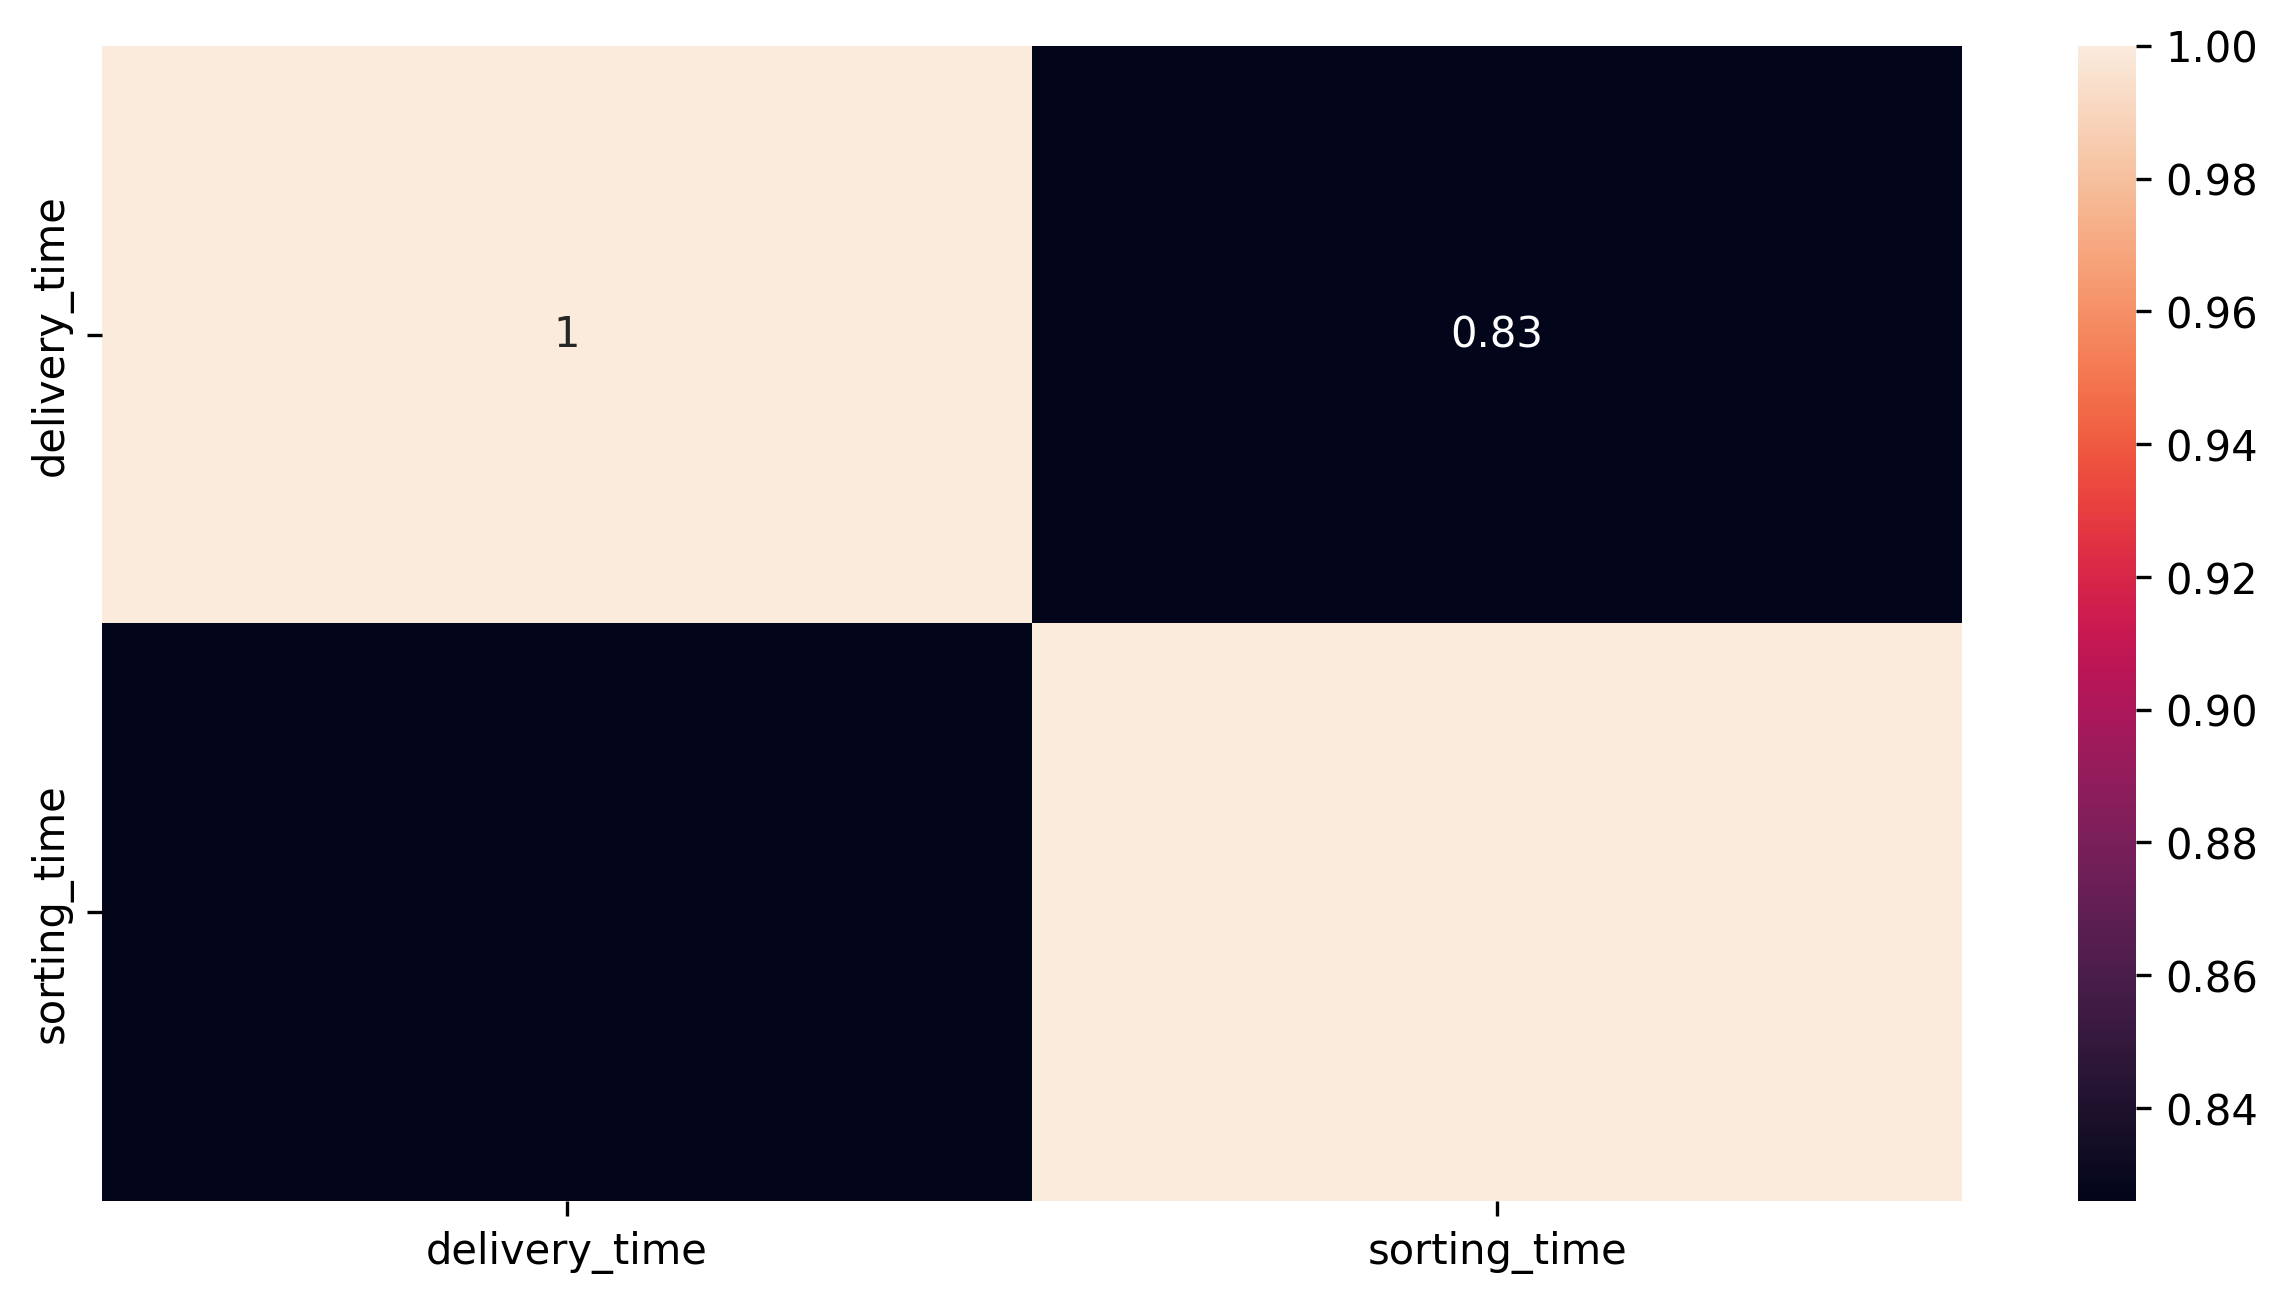

In [17]:
sns.heatmap(df.corr() , annot= True)

<Axes: xlabel='sorting_time', ylabel='delivery_time'>

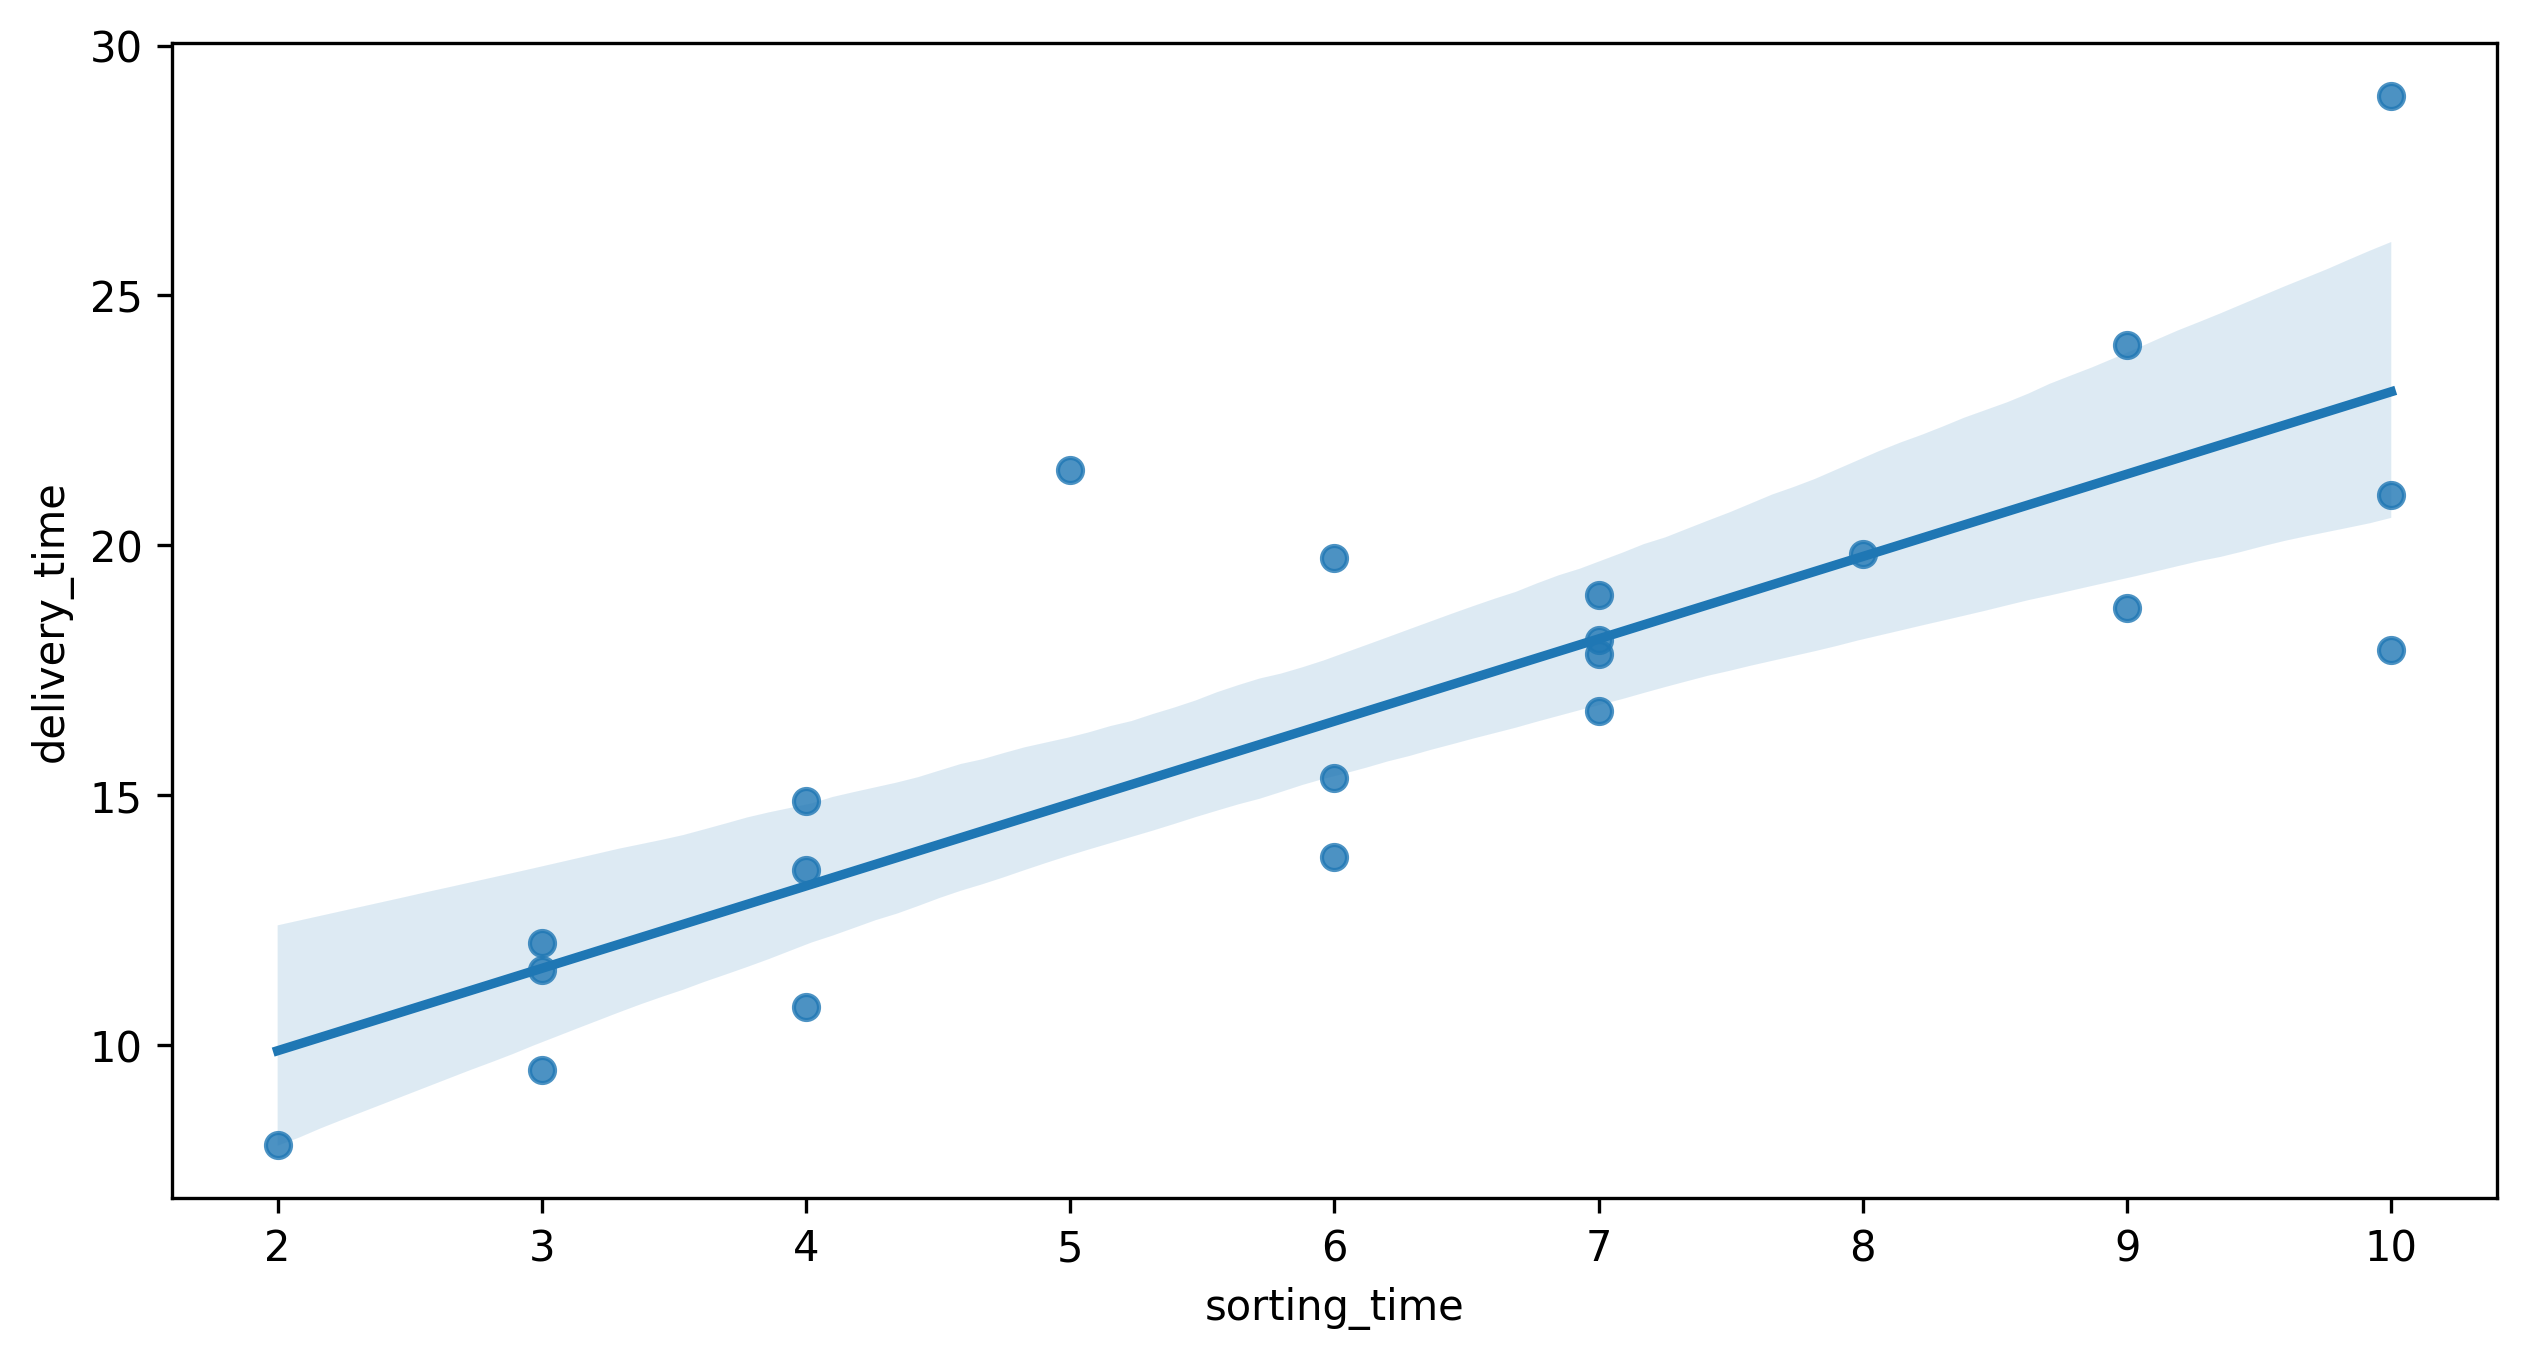

In [18]:
sns.regplot(x=df['sorting_time'],y=df['delivery_time'])

In [19]:
model = smf.ols('delivery_time ~ sorting_time' , data=df).fit()

In [20]:
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [21]:
model.pvalues

Intercept       0.001147
sorting_time    0.000004
dtype: float64

In [22]:
delivery_time = (6.582734) + (1.649020) * (5)
delivery_time

14.827834

In [23]:
model.rsquared  , model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

In [24]:
new_data = pd.Series([5,8])
new_data

0    5
1    8
dtype: int64

In [25]:
data_pred = pd.DataFrame(new_data , columns =['sorting_time'])
data_pred

,sorting_time
0,5
1,8


In [26]:
model.predict(data_pred)

0    14.827833
1    19.774893
dtype: float64

# Q2 →→→ANS

In [27]:
df = pd.read_csv(r"C:\Users\mange\OneDrive\Documents\DS\Assignmnet_Material\Simple_Linear_Regression\Salary_Data.csv")
df

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\mange\\OneDrive\\Documents\\DS\\Assignmnet_Material\\Simple_Linear_Regression\\Salary_Data.csv'

In [ ]:
df.describe()

In [ ]:
df.isna().sum()

In [ ]:
plt.subplot(1,2,1)
sns.distplot(df['YearsExperience'])

plt.subplot(1,2,2)
sns.distplot(df['Salary'])

plt.tight_layout()

In [ ]:
df = df.rename({'YearsExperience' : 'yexp' , 'Salary' : 'salary'},axis = 1)
df

In [ ]:
df.corr()

In [ ]:
sns.heatmap(df.corr() , annot=True)

In [ ]:
sns.regplot(x=df['yexp'] , y=df['salary'])

In [ ]:
model = smf.ols('salary ~ yexp' , data=df).fit()

In [ ]:
model.params

In [ ]:
model.pvalues

In [ ]:
model.rsquared , model.rsquared_adj

In [ ]:
# Manual prediction for let's say 3 years.

model_pred = 9449.96*3+25792.20
model_pred

In [ ]:
# Automatic prediction for let say 5 and 7 years.

In [ ]:
test = pd.DataFrame({
    'yexp':[1,.5,2,3,3.1]
})
test

In [ ]:
model.predict(test)